In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta

In [2]:
#We will predict the next market close
#First get the last 100 days of full data
#today's date
today = dt.datetime.today()
#set up params for start and end date
end = today
start = today - timedelta(100)

In [3]:
#get apple stock price info for last 100 days
df = web.DataReader('TSLA', data_source='yahoo', start=start, end=end)
df["next_day_close"] = df["Close"].shift(-1)
df["next_day_performance"] = (df["next_day_close"] - df["Close"])/df["Close"]
df = df.dropna()
df['is_positive'] = np.where(df['next_day_performance'] > 0, 1, 0)
df['datarow'] = np.arange(len(df))+1
df = df.reset_index()
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,next_day_close,next_day_performance,is_positive,datarow
64,2020-05-13,826.000000,763.299988,820.830017,790.960022,19065500,790.960022,803.330017,0.015639,1,65
65,2020-05-14,803.359985,764.000000,780.000000,803.330017,13682200,803.330017,799.169983,-0.005178,0,66
66,2020-05-15,805.049988,786.549988,790.349976,799.169983,10518400,799.169983,813.630005,0.018094,1,67
67,2020-05-18,834.719971,803.880005,827.780029,813.630005,11698100,813.630005,808.010010,-0.006907,0,68
68,2020-05-19,822.070007,806.080017,815.169983,808.010010,9607100,808.010010,815.559998,0.009344,1,69


In [4]:
#Create the variables for independent and dependent variables
dates = []
prices = []

In [5]:
df.shape

(69, 11)

In [6]:
#Get the last row of data - this will be the data we test on
df.tail(1)

,Date,High,Low,Open,Close,Volume,Adj Close,next_day_close,next_day_performance,is_positive,datarow
68,2020-05-19,822.070007,806.080017,815.169983,808.01001,9607100,808.01001,815.559998,0.009344,1,69


In [7]:
#Get all the data except the last row
df2 = df.head(len(df)-1)
df2

,Date,High,Low,Open,Close,Volume,Adj Close,next_day_close,next_day_performance,is_positive,datarow
0,2020-02-11,783.510010,758.000000,768.789978,774.380005,11697500,774.380005,767.289978,-0.009156,0,1
1,2020-02-12,789.750000,763.369995,777.869995,767.289978,12022500,767.289978,804.000000,0.047844,1,2
2,2020-02-13,818.000000,735.000000,741.840027,804.000000,26289300,804.000000,800.030029,-0.004938,0,3
3,2020-02-14,812.969971,785.500000,787.219971,800.030029,15693700,800.030029,858.400024,0.072960,1,4
4,2020-02-18,860.000000,832.359985,841.599976,858.400024,16381700,858.400024,917.419983,0.068756,1,5
...,...,...,...,...,...,...,...,...,...,...,...
63,2020-05-12,843.289978,808.000000,827.000000,809.409973,15906900,809.409973,790.960022,-0.022794,0,64
64,2020-05-13,826.000000,763.299988,820.830017,790.960022,19065500,790.960022,803.330017,0.015639,1,65
65,2020-05-14,803.359985,764.000000,780.000000,803.330017,13682200,803.330017,799.169983,-0.005178,0,66
66,2020-05-15,805.049988,786.549988,790.349976,799.169983,10518400,799.169983,813.630005,0.018094,1,67


In [8]:
#new shape of data just to check
df2.shape

(68, 11)

In [9]:
#Get all the rows from the date column
df_dates = df2.loc[:, 'datarow']
df_close = df2.loc[:, 'Close']


In [10]:
#Create the independent dataset (X)
for date in df_dates:
    dates.append( [date])
    
#Create the dependent dataset (y)
for close_price in df_close:
    prices.append(float(close_price))

In [11]:
def predict_prices(dates, prices, x):
    
    #create the 3 support vector regression models
    svr_lin = SVR(kernel='linear', C=1e3)
    svr_poly= SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    
    #train the SVR models
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    #create linear regression model
    lin_reg = LinearRegression()
    #train linear regression model
    lin_reg.fit(dates, prices)
    
    #plot
    plt.scatter(dates, prices, color='black', label="Data")
    plt.plot(dates, svr_rbf.predict(dates), color='red', label="SVR RBF")
    plt.plot(dates, svr_poly.predict(dates), color='blue', label="SVR POLY")
    plt.plot(dates, svr_lin.predict(dates), color='green', label="SVR Linear")
    plt.plot(dates, lin_reg.predict(dates), color='orange', label="Linear Reg")
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.title("Regression")
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_poly.predict(x)[0], svr_lin.predict(x)[0], lin_reg.predict(x)[0]



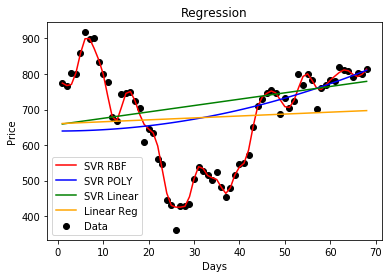

SVR RBF Prediction: 818.74, SVR POLY Prediction: 815.68, SVR LInear Prediction: 780.99, Linear Regression Prediction: 697.46
-------------
Actual Close: 808.01


In [12]:
#predict day 30
predicted_price = predict_prices(dates, prices, [[int(df.tail(1).datarow)]])
print(f"SVR RBF Prediction: {round(predicted_price[0],2)}, SVR POLY Prediction: {round(predicted_price[1],2)}, SVR LInear Prediction: {round(predicted_price[2],2)}, Linear Regression Prediction: {round(predicted_price[3],2)}")
print("-------------")
print(f"Actual Close: {round(float(df.tail(1)['Close']),2)}")

In [13]:
#Make a reusable function where the only input is an array of stocks. 
def multiple_stocks(symbols):
    for symbol in symbols:
        df = web.DataReader(f'{symbol}', data_source='yahoo', start=start, end=end)
        df["next_day_close"] = df["Close"].shift(-1)
        df["next_day_performance"] = (df["next_day_close"] - df["Close"])/df["Close"]
        df = df.dropna()
        df['is_positive'] = np.where(df['next_day_performance'] > 0, 1, 0)
        df['datarow'] = np.arange(len(df))+1
        df = df.reset_index()
        #Create the variables for independent and dependent variables
        dates = []
        prices = []
        #Get all the data except the last row
        df2 = df.head(len(df)-1)
        df_dates = df2.loc[:, 'datarow']
        df_close = df2.loc[:, 'Close']
        #Create the independent dataset (X)
        for date in df_dates:
            dates.append( [date])
        #Create the dependent dataset (y)
        for close_price in df_close:
            prices.append(float(close_price))
        #predict latest close
        predicted_price = predict_prices(dates, prices, [[int(df.tail(1).datarow)]])
        print(f"SVR RBF Prediction: {round(predicted_price[0],2)}, SVR POLY Prediction: {round(predicted_price[1],2)}, SVR LInear Prediction: {round(predicted_price[2],2)}, Linear Regression Prediction: {round(predicted_price[3],2)}")
        print("-------------")
        print(f"Actual Close: {round(float(df.tail(1)['Close']),2)}")

In [14]:
#here's an example we'll just use 3 stocks, Tesla, Apple, and Pfizer
#and using last 100 days we'll compare which stock the model best predicts for. 
symbols = ["TSLA", "AAPL", "PFE"]

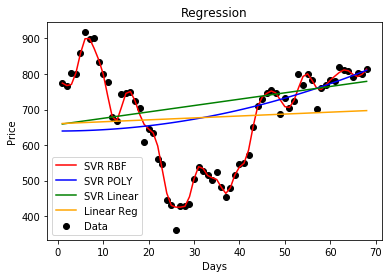

SVR RBF Prediction: 818.74, SVR POLY Prediction: 815.68, SVR LInear Prediction: 780.99, Linear Regression Prediction: 697.46
-------------
Actual Close: 808.01


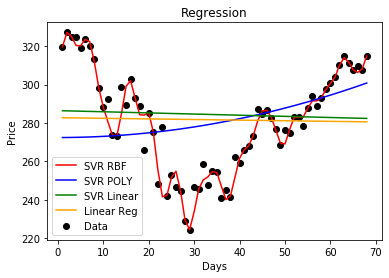

SVR RBF Prediction: 324.4, SVR POLY Prediction: 301.63, SVR LInear Prediction: 282.31, Linear Regression Prediction: 280.57
-------------
Actual Close: 313.14


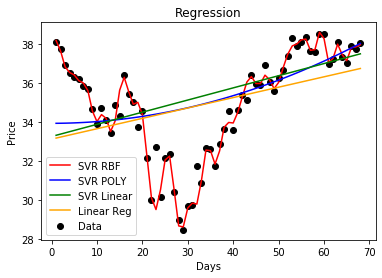

SVR RBF Prediction: 40.4, SVR POLY Prediction: 38.16, SVR LInear Prediction: 37.57, Linear Regression Prediction: 36.81
-------------
Actual Close: 37.68


In [15]:
#run the function
multiple_stocks(symbols)

In [46]:
#Multiple regression merging in LDA and NMF Numbers. 
# Read the csv file into a pandas DataFrame
mrdf = pd.read_csv('../Data/Combined_News_DJIA_single_topic.csv')
mrdf.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top21,Top22,Top23,Top24,Top25,combined_headlines,lda_topic,lda_topic_readable,nmf_topic,nmf_topic_readable
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia 'downs two Russian warplanes' as coun...,1,"0.006*""russian"" + 0.006*""russia"" + 0.004*""forc...",9,"['military', 'bush', 'conflict', 'south', 'rus..."
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they wo...,1,"0.006*""russian"" + 0.006*""russia"" + 0.004*""forc...",9,"['military', 'bush', 'conflict', 'south', 'rus..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at...,1,"0.006*""russian"" + 0.006*""russia"" + 0.004*""forc...",9,"['military', 'bush', 'conflict', 'south', 'rus..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: ...,1,"0.006*""russian"" + 0.006*""russia"" + 0.004*""forc...",9,"['military', 'bush', 'conflict', 'south', 'rus..."
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Saudi Arabia: Mother moves to block child ma...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur re

In [47]:
djiadf = web.DataReader('DJIA', data_source='yahoo', start='2008-08-08', end='2016-07-01').reset_index()
djiadf

,Date,High,Low,Open,Close,Volume,Adj Close
0,2008-08-08,11808.490234,11344.230469,11432.089844,11734.320312,4966810000,11734.320312
1,2008-08-11,11933.549805,11580.190430,11729.669922,11782.349609,5067310000,11782.349609
2,2008-08-12,11830.389648,11541.429688,11781.700195,11642.469727,4711290000,11642.469727
3,2008-08-13,11689.049805,11377.370117,11632.809570,11532.959961,4787600000,11532.959961
4,2008-08-14,11744.330078,11399.839844,11532.070312,11615.929688,4064000000,11615.929688
...,...,...,...,...,...,...,...
1984,2016-06-27,17355.210938,17005.439453,17355.210938,17140.240234,5431220000,17140.240234
1985,2016-06-28,17453.929688,17174.960938,17190.509766,17409.720703,4385810000,17409.720703
1986,2016-06-29,17737.380859,17456.019531,17456.019531,17694.679688,4241740000,17694.679688
1987,2016-06-30,17970.259766,17647.189453,17719.539062,17929.990234,4622820000,17929.990234


In [48]:
djiadf1 = djiadf[["Date","Adj Close"]]
djiadf1["Date"] = djiadf1["Date"].astype(str)
djiadf1

<ipython-input-48-54934248895b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  djiadf1["Date"] = djiadf1["Date"].astype(str)


,Date,Adj Close
0,2008-08-08,11734.320312
1,2008-08-11,11782.349609
2,2008-08-12,11642.469727
3,2008-08-13,11532.959961
4,2008-08-14,11615.929688
...,...,...
1984,2016-06-27,17140.240234
1985,2016-06-28,17409.720703
1986,2016-06-29,17694.679688
1987,2016-06-30,17929.990234


In [55]:
#merge mrdf and djiadf1
merged = pd.merge(mrdf, djiadf1, on="Date")
merged.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,combined_headlines,lda_topic,lda_topic_readable,nmf_topic,nmf_topic_readable,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia 'downs two Russian warplanes' as coun...,1,"0.006*""russian"" + 0.006*""russia"" + 0.004*""forc...",9,"['military', 'bush', 'conflict', 'south', 'rus...",11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they wo...,1,"0.006*""russian"" + 0.006*""russia"" + 0.004*""forc...",9,"['military', 'bush', 'conflict', 'south', 'rus...",11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at...,1,"0.006*""russian"" + 0.006*""russia"" + 0.004*""forc...",9,"['military', 'bush', 'conflict', 'south', 'rus...",11642.469727
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: ...,1,"0.006*""russian"" + 0.006*""russia"" + 0.004*""forc...",9,"['military', 'bush', 'conflict', 'south', 'rus...",11532.959961
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,All the experts admit that we should legalise...,1,"0.006*""russian"" + 0.006*

In [57]:
# Assign the data to X and y

X = merged[["lda_topic", "nmf_topic"]]
y = merged["Adj Close"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1986, 2) (1986, 1)


In [58]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [59]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [60]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.16716942043268967
Testing Score: 0.15038268267556432


Text(0.5, 1.0, 'Residual Plot')

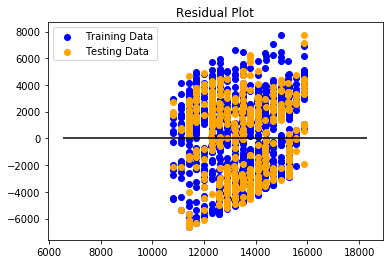

In [61]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [62]:
#Multiple regression w/ label (did the stock market go up or down, using lda and nmf for independent variables)
# Assign the data to X and y

X = merged[["lda_topic", "nmf_topic"]]
y = merged["Label"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1986, 2) (1986, 1)


In [63]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [64]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [65]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.0002034626881811663
Testing Score: -0.0014486359002903182


Text(0.5, 1.0, 'Residual Plot')

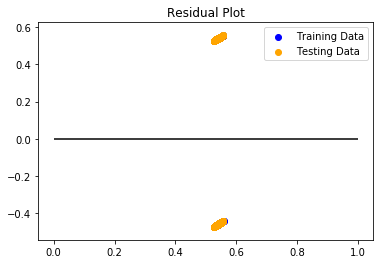

In [66]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")